In [23]:
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop

Found 999 images belonging to 3 classes.
Found 0 images belonging to 3 classes.


{'Level_0': 0, 'Level_1': 1, 'Level_2': 2}

In [31]:
img = image.load_img("C:/Users/Dell/Downloads/acnelevel/train/Level_1/levle1_64.jpg")

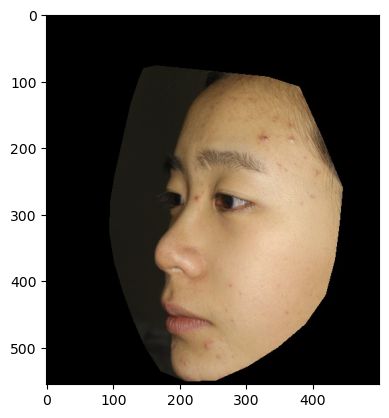

In [32]:
plt.imshow(img)

In [34]:
cv2.imread("C:/Users/asus/Downloads/acnelevel/train/Level_1/levle1_64.jpg").shape

(555, 500, 3)

In [35]:
train = ImageDataGenerator(rescale = 1/255)
validation = ImageDataGenerator(rescale = 1/255)

In [36]:
train_dataset = train.flow_from_directory("C:/Users/Dell/Downloads/acnelevel/train/",
                                         target_size=(200, 200),
                                         batch_size=25,
                                         class_mode='categorical')

validation_dataset = train.flow_from_directory("C:/Users/Dell/Downloads/acnelevel/validation/",
                                         target_size=(200, 200),
                                         batch_size=25,
                                         class_mode='categorical')


Found 999 images belonging to 3 classes.
Found 0 images belonging to 3 classes.


In [37]:
train_dataset.class_indices

{'Level_0': 0, 'Level_1': 1, 'Level_2': 2}

In [49]:
model = tf.keras.models.Sequential([ tf.keras.layers.Conv2D(16,(3,3), activation = 'relu', input_shape = (200,200,3)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(32,(3,3), activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(64,(3,3), activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    ##
                                    tf.keras.layers.Flatten(),
                                    ##
                                    tf.keras.layers.Dense(512,activation= 'relu'),
                                    ##
                                    tf.keras.layers.Dense(3,activation='softmax')
                                    
                                    
    
])

In [50]:
model.compile(loss= 'categorical_crossentropy',
             optimizer = RMSprop(learning_rate=0.001),
              metrics = ['accuracy']
             )

In [52]:
try:
    model_fit = model.fit(
        train_dataset,
        steps_per_epoch=len(train_dataset),
        epochs=15,
        validation_data=validation_dataset
    )
except Exception as e:
    print("Error during training:", e)


Epoch 1/15
40/40 [==============================] - 13s 325ms/step - loss: 0.3299 - accuracy: 0.8689
Epoch 2/15
40/40 [==============================] - 13s 322ms/step - loss: 0.2403 - accuracy: 0.9039
Epoch 3/15
40/40 [==============================] - 14s 336ms/step - loss: 0.1519 - accuracy: 0.9479
Epoch 4/15
40/40 [==============================] - 13s 330ms/step - loss: 0.1048 - accuracy: 0.9620
Epoch 5/15
40/40 [==============================] - 13s 325ms/step - loss: 0.0746 - accuracy: 0.9820
Epoch 6/15
40/40 [==============================] - 13s 332ms/step - loss: 0.0481 - accuracy: 0.9860
Epoch 7/15
40/40 [==============================] - 13s 330ms/step - loss: 0.0473 - accuracy: 0.9890
Epoch 8/15
40/40 [==============================] - 13s 320ms/step - loss: 0.0348 - accuracy: 0.9920
Epoch 9/15
40/40 [==============================] - 13s 325ms/step - loss: 0.0528 - accuracy: 0.9840
Epoch 10/15
40/40 [==============================] - 14s 343ms/step - loss: 0.0309 - accura

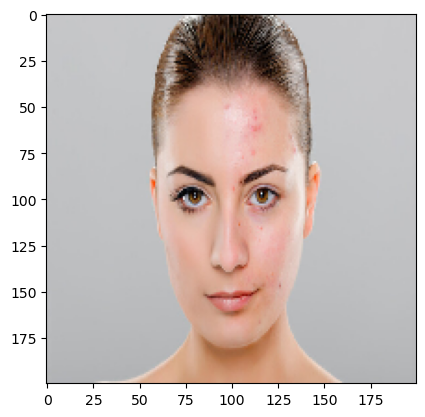

1/1 [==============================] - 0s 23ms/step
Acne Level: Level 1


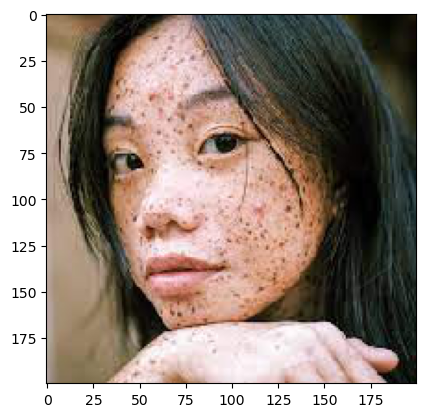

1/1 [==============================] - 0s 23ms/step
Acne Level: Level 1


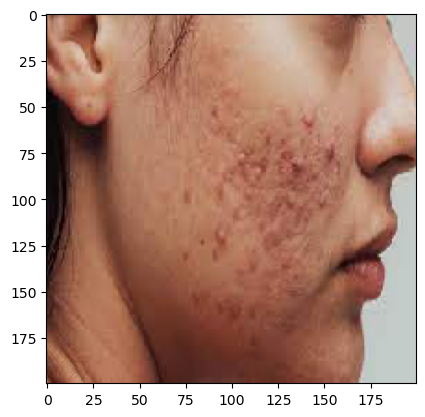

1/1 [==============================] - 0s 26ms/step
Acne Level: Level 0


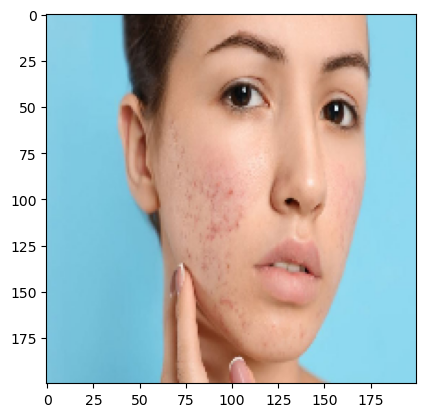

1/1 [==============================] - 0s 27ms/step
Acne Level: Level 1


In [58]:
dir_path = 'C:/Users/Dell/Downloads/acnelevel/try'

for i in os.listdir(dir_path):
    img_path = os.path.join(dir_path, i)
    img = image.load_img(img_path, target_size=(200, 200))
    plt.imshow(img)
    plt.show()

    X = image.img_to_array(img)
    X = np.expand_dims(X, axis=0)
    images = np.vstack([X])
    val = model.predict(images)

    predicted_class = np.argmax(val)  # Get the index of the highest probability class

    if predicted_class == 0:
        print('Acne Level: Level 0')
    elif predicted_class == 1:
        print('Acne Level: Level 1')
    else:
        print('Acne Level: Level 2')
